# Introduction to Create Function Statement

The `create function` statement allows you to define a new user-defined function.

Here’s the syntax of the `create function` statement:

```postgresql
create [or replace] function function_name(param_list)
   returns return_type
   language plpgsql
  as
$$
declare
   -- variable declaration
begin
   -- logic
end;
$$; 
```

In this syntax:
* First, specify the name of the function after the `create function` keywords. To replace the existing function, use the `or replace` option.
* Then, list out parameters surrounded by parentheses after the function name. A function can have zero or more parameters.
* Next, define the datatype of the returned value after the `returns` keyword.
* After that, use the `language plpgsql` to define the procedural language of the function. Note that PostgreSQL supports many languages, including `plpgsql`.
* Finally, place a block in the dollar-quoted string constant to define the function body.

# PostgreSQL Create Function statement examples

We’ll use the `film` table from the sample database.

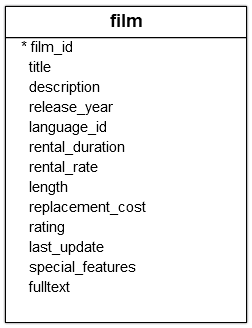

The following statement creates a function that returns the number of films whose length is between the `len_from` and `len_to` parameters:

```postgresql
create function get_film_count(len_from int, len_to int)
returns int
language plpgsql
as
$$
declare
   film_count integer;
begin
   select count(*)
   into film_count
   from film
   where length between len_from and len_to;

   return film_count;
end;
$$; 
```

**Output:**

```
CREATE FUNCTION
```

The function `get_film_count` has two main sections: **header** and **body**.

In the **header** section:
* First, the name of the function is `get_film_count` that follows the `create function` keywords.
* Second, the `get_film_count()` function accepts two parameters `len_from` and `len_to` with the `integer` type.
* Third, the `get_film_count` function returns an integer specified by the `returns int` clause.
* Finally, the language of the function is `plpgsql`, indicated by the `language plpgsql`.

In the **function** body:
* Use the dollar-quoted string constant syntax that starts with `$$` and ends with `$$`. Between these `$$`, you can place a block containing the declaration and logic of the function.
* In the declaration section, declare a variable film_count that stores the number of films from the `film` table.
* In the body of the block, use the `select into` statement to select the number of films whose lengths are between `len_from` and `len_to` and assign it to the `film_count` variable. At the end of the block, use the `return` statement to return the `film_count`.

To execute the create function statement, you can use any PostgreSQL client tool including psql and pgAdmin

# Creating a function using pgAdmin

* First, launch the pgAdmin tool and connect to the sample database.
* Second, open the query tool by selecting **Tools > Query Tool**.
* Third, enter the above code in the query tool and click the **Execute** button to create the `get_film_count` function.

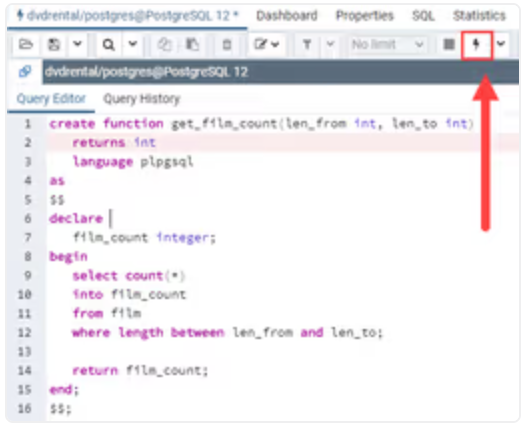

If everything is fine, you will see the following message:

```
CREATE FUNCTION

Query returned successfully in 44 msec.
```

It means that the function `get_film_count` is created successfully.

Finally, view the function `get_film_count` in the Functions list:

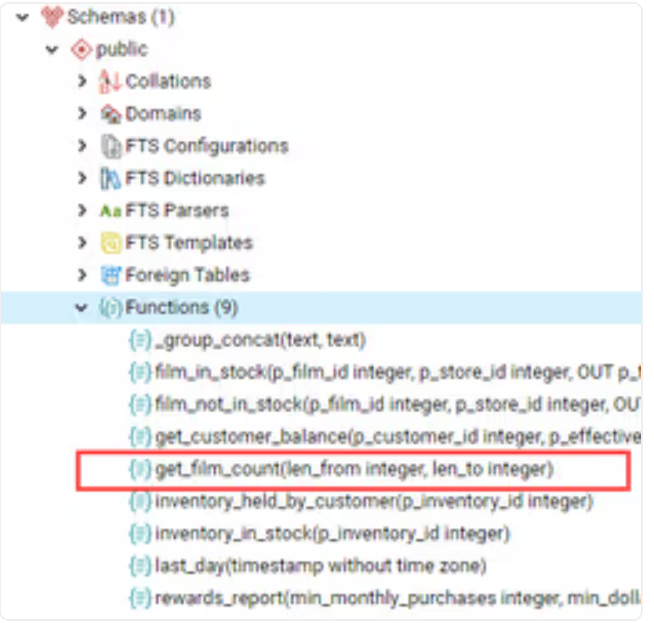

If you cannot find the function name, right-click the Functions node and select **Refresh…** menu item to refresh the function list.

# Calling a user-defined function

PostgreSQL provides you with three ways to call a user-defined function:
* Using positional notation
* Using named notation
* Using the mixed notation.

## 1) Using positional notation

When invoking a function using the positional notation, you need to supply the arguments in the exact order as the parameters are defined within the function signature:

```postgresql
select get_film_count(40,90); 
```

**Output:**

```
get_film_count
----------------
            325
(1 row)
```

In this example, the arguments of the `get_film_count()` are `40` and `90` that corresponds to the `from_len` and `to_len` parameters.

You call a function using the positional notation when the function has few parameters.

If the function has many parameters, you should call it using the named notation because it will make the function call more obvious.

## 2) Using named notation

The following shows how to call the `get_film_count` function using the named notation:

```postgresql
select get_film_count(
    len_from => 40,
     len_to => 90
); 
```

**Output:**

```
get_film_count
----------------
            325
(1 row)
```

In the named notation, you use the `=>` to separate the argument’s name and its value.

For backward compatibility, PostgreSQL supports the older syntax based on `:=` as follows:

```postgresql
select get_film_count(
    len_from := 40,
    len_to := 90
); 
```


## 3) Using mixed notation

**The mixed notation is the combination of positional and named notations.** 

For example:

```postgresql
select get_film_count(40, len_to => 90); 
```

**Note that you cannot use the named arguments before positional arguments like this:**

```postgresql
select get_film_count(len_from => 40, 90); 
```

**Error:**

```
ERROR:  positional argument cannot follow named argument
LINE 1: select get_film_count(len_from => 40, 90); 
```